# 📘 Daugialypė regresija su valandiniais duomenimis (`hour.csv`)

Šiame praktiniame darbe analizuosime dviračių nuomos duomenis valandiniu lygmeniu, taikydami regresijos modelius ir interpretuodami rezultatus.

## 📦 1. Duomenų paruošimas

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns

# Įkeliame duomenų rinkinį
df = pd.read_csv('hour.csv')

# # Sukuriame sąveikos kintamąjį
# df['temp_working'] = df['temp'] * df['workingday']

# Pasirenkame kintamuosius
X = df[['hr', 'temp',  'windspeed', 'workingday']]
y = df['cnt']

In [16]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,10,14,81,0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,9,14,80,0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,9,14,80,0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,10,14,75,0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,10,14,75,0,0,1,1


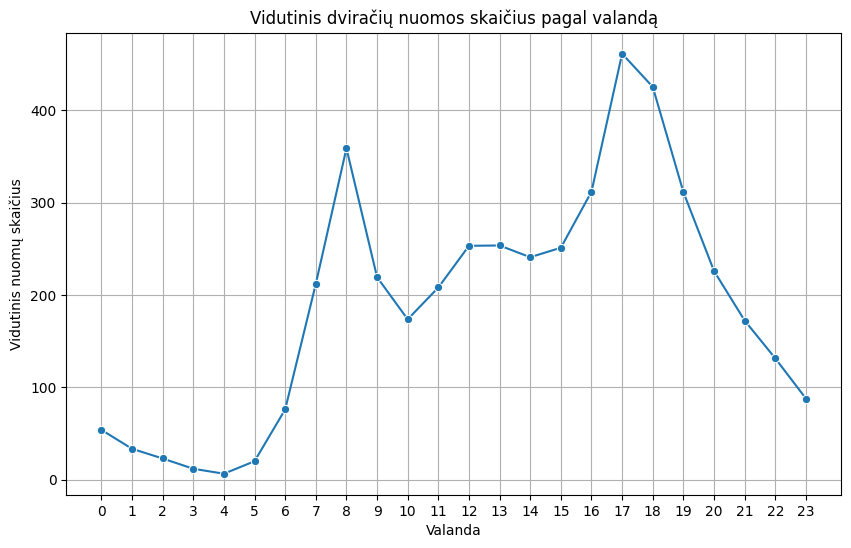

In [17]:
# Grupavimas pagal valandą
avg_count_per_hour = df.groupby("hr")["cnt"].mean().reset_index()

# Braižymas
plt.figure(figsize=(10,6))
sns.lineplot(data=avg_count_per_hour, x="hr", y="cnt", marker="o")
plt.title("Vidutinis dviračių nuomos skaičius pagal valandą")
plt.xlabel("Valanda")
plt.ylabel("Vidutinis nuomų skaičius")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

### 📊 Regresijos rezultatai: kintamasis `hr` (valanda)

| **Kintamasis** | **Koeficientas (coef)** | **P>t** | **Interpretacija**                  |
|----------------|--------------------------|--------|-------------------------------------|
| `hr` (valanda) | 7.45                     | 0.000  | ✅ Statistiškai reikšmingas         |

---

#### 🧠 Paaiškinimas:

- **Koeficientas 7.45** reiškia, kad kiekviena papildoma valanda dienoje padidina dviračių nuomos skaičių **vidutiniškai 7.45 vienetais**, laikant kitus kintamuosius pastoviais.
- Kadangi **p-vertė yra 0.000**, šis efektas yra **labai statistiškai reikšmingas**, t. y. poveikis greičiausiai **nėra atsitiktinis**.

---

#### 📌 Papildomi pastebėjimai:

- Piko laikai: **rytais apie 8 val.** ir **vakarais apie 17–18 val.**, kai žmonės vyksta į / iš darbo.
- **Naktį ir ankstyvais rytais** dviračių nuomos kiekiai yra labai maži.

---

✅ **Išvada**: valandos (dienos laikas) turi **reikšmingą ir aiškiai matomą poveikį** dviračių nuomos kiekiui – tiek modelio koeficientuose, tiek analizuojant duomenis vizualiai.

## 🔗 2. Koreliacijų matrica

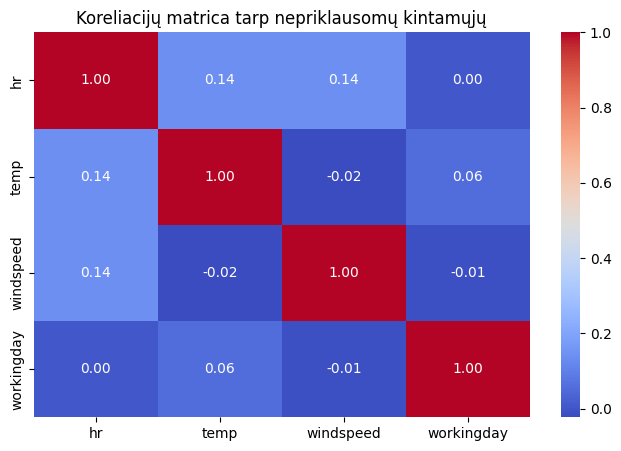

In [18]:
plt.figure(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Koreliacijų matrica tarp nepriklausomų kintamųjų')
plt.show()

## 🔁 3. VIF analizė (Multikolinearumo patikra)

In [19]:
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Kintamasis'] = X_const.columns
vif_data['VIF reikšmė'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data

,Kintamasis,VIF reikšmė
0,const,13.286240
1,hr,1.040157
2,temp,1.024197
3,windspeed,1.021184
4,workingday,1.003188


## 📈 4. Regresijos modelis su sąveikos terminu

In [20]:
model = sm.OLS(y, X_const).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     1719.
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:25:02   Log-Likelihood:            -1.1214e+05
No. Observations:               17379   AIC:                         2.243e+05
Df Residuals:                   17374   BIC:                         2.243e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -98.6464      4.246    -23.235      0.000    -106.968     -90.325
hr             8.8446      0.172     51.479      0.000       8.508       9.181
temp           8.2327      0.149     55.229      0.000       7.941       8.525
windspeed      1.2270      0.144      8.545      0.000       0.946       1.508
workingday     4.0306      2.507      1.608      0.108      -0.883       8.944
==============================================================================
Omnibus:                     3997.554   Durbin-Watson:                   0.484
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8657.697
Skew:                           1.334   Prob(JB):                         0.00
Kurtosis:                       5.200   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
#####Kaip pašalinti kintamąjį iš modelio
# Pasirenkame kintamuosius
X = df[['hr', 'temp', 'hum']]
y = df['cnt']
X_const = sm.add_constant(X)
# Sukuriame modelį
model = sm.OLS(y, X_const).fit()
# Išvedame modelio santrauką
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.325
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     2787.
Date:                Fri, 08 Aug 2025   Prob (F-statistic):               0.00
Time:                        17:25:02   Log-Likelihood:            -1.1163e+05
No. Observations:               17379   AIC:                         2.233e+05
Df Residuals:                   17375   BIC:                         2.233e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.0338      5.650     12.219      0.000      57.960      80.107
hr             7.4858      0.171     43.658      0.000       7.150       7.822
temp           8.0257      0.144     55.568      0.000       7.743       8.309
hum           -2.0630      0.061    -33.809      0.000      -2.183      -1.943
==============================================================================
Omnibus:                     4359.334   Durbin-Watson:                   0.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10276.383
Skew:                           1.408   Prob(JB):                         0.00
Kurtosis:                       5.503   Cond. No.                         346.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['Kintamasis'] = X_const.columns
vif_data['VIF reikšmė'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif_data


,Kintamasis,VIF reikšmė
0,const,24.966142
1,hr,1.099405
2,temp,1.020392
3,hum,1.084027


## 🧠 5. Interpretacija
- Kurie kintamieji yra reikšmingi (p < 0.05)?
- Ką reiškia sąveikos efektas `temp * workingday`?
- Koks yra modelio R²?

